In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/CAvideos.csv
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/GB_category_id.json


# Correlation between features on youtube

This project has interest mostly in analysing the correlation between views and likes, and also some computable float values(also analysing boolean values on the last part)
Although the 'like button' indicates more directly how people like videos, but views are related to the earnings of the youtube creaters. That's why we skip on looking over the correlation between likes and other factors.

As I'm a korean, and there seems not to be many koreans here, I target specifically on the korean datas.

Based on our analysis, we'll create different ML models and depending upon their accuracies, use the most suitable model for the prediction.

# 1. Importing Dataset

In [3]:
krv = pd.read_csv('/kaggle/input/youtube-new/KRvideos.csv', engine='python')
display(krv.head())
print(krv.columns)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


# 2. Importing Libraries

In [4]:
#data processing
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

#algorithms
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

#dataframe display settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

#data visualization
import matplotlib as mpl
import matplotlib.pylab as plt

# 3. Data Exploration

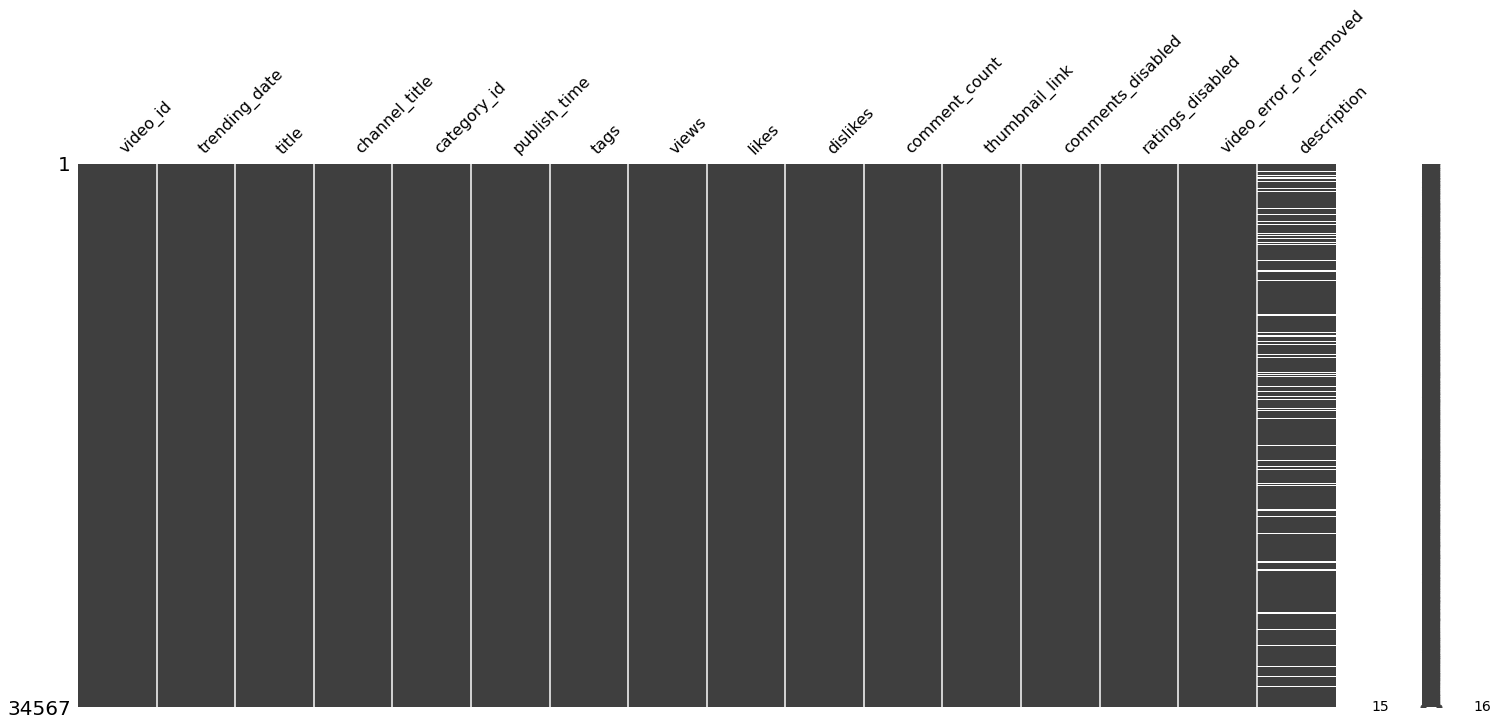

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64


In [5]:
import missingno as msno
#checking if there's any empty values on the chart.

msno.matrix(krv)
plt.show()

print(krv.isnull().sum())

In [6]:
krv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

Seems like there's no empty value excep for description.

To check it quick, let me visualize if there's any linear correlation between features here.

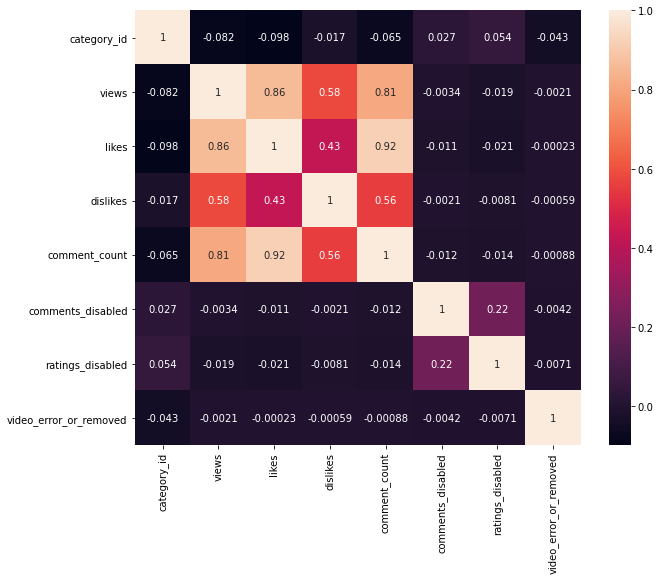

In [7]:
corr_list = ['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description']
corr = krv[corr_list].corr()  #Pearson Correlation Coefficient


plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True, cbar=True)

Through the visualization, we just checked the relativly strong correlations between 'views', 'likes', 'dislikes', 'comment_count', and also a weak linear correlation between 'comments_disabled' and 'ratings_disalbed.'

In [8]:
from sklearn.linear_model import LinearRegression

idx = ['views', 'dislikes', 'comment_count', 'likes']

features = idx.copy()
features = ["scale({})".format(name) for name in features] #Scale to make sure there's no huge condition number.

model = sm.OLS.from_formula("likes ~ " + "+".join(features), data=krv)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.042e+33
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:42:31   Log-Likelihood:             7.2340e+05
No. Observations:               34567   AIC:                        -1.447e+06
Df Residuals:                   34562   BIC:                        -1.447e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.219e+04 

# 3-1. Likes and views

In [9]:
x = idx.copy()
X = krv[x]
X = X.drop('likes', axis = 1)

y = krv['likes']

print(X, y)

        views  dislikes  comment_count
0      156130        40            272
1       76533        28            113
2      421409       166            459
3      222850       173           1219
4       84466       109            450
...       ...       ...            ...
34562  156439        58            308
34563  130948        55            988
34564   62555        71            105
34565   63306        27            571
34566   63716        58            135

[34567 rows x 3 columns] 0        1422
1         211
2        5112
3        2093
4        1094
         ... 
34562     383
34563    3121
34564     319
34565    2369
34566     500
Name: likes, Length: 34567, dtype: int64


In [10]:
X.iloc[:, 0]

0        156130
1         76533
2        421409
3        222850
4         84466
          ...  
34562    156439
34563    130948
34564     62555
34565     63306
34566     63716
Name: views, Length: 34567, dtype: int64

In [22]:
func = lambda x: np.log(x+1) #logging to visualize bigger values on low unit.
X = X.apply(func)
y = y.apply(func)
print(X, y) 

          views  dislikes  comment_count
0      1.270251  0.936268       1.060739
1      1.254236  0.905894       1.010435
2      1.290768  1.033624       1.086703
3      1.277828  1.036000       1.129038
4      1.256521  1.008159       1.085766
...         ...       ...            ...
34562  1.270294  0.965015       1.067146
34563  1.266407  0.961071       1.120519
34564  1.249487  0.979564       1.005777
34565  1.249770  0.902628       1.096805
34566  1.249924  0.965015       1.021405

[34567 rows x 3 columns] 0        7.260523
1        5.356586
2        8.539542
3        7.646831
4        6.998510
           ...   
34562    5.950643
34563    8.046229
34564    5.768321
34565    7.770645
34566    6.216606
Name: likes, Length: 34567, dtype: float64


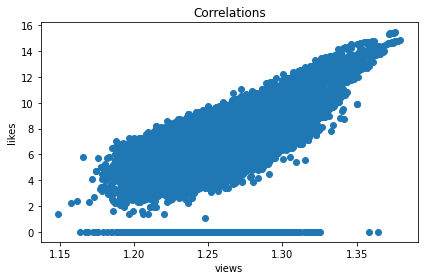

In [28]:
ax = plt.subplot(1, 1, 1)
plt.scatter(X.iloc[:, [0]], y)
plt.title('Correlations')
plt.xlabel('views')
plt.ylabel('likes')
plt.tight_layout()
plt.show()

Seems that it has a weak correlation between 'likes' and 'views', but even when there's some view points, likes can still be converged to zero.

# 3-2. Likes and Dislikes

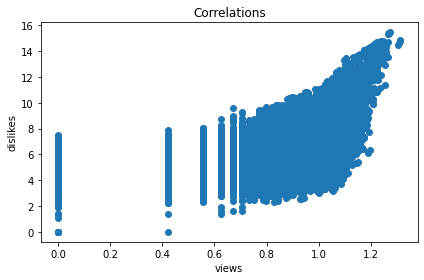

In [25]:
ax = plt.subplot(1, 1, 1)
plt.scatter(X.iloc[:, [1]], y)
plt.title('Correlations')
plt.xlabel('views')
plt.ylabel('dislikes')
plt.tight_layout()
plt.show()

# 3-3. Likes and comment_count

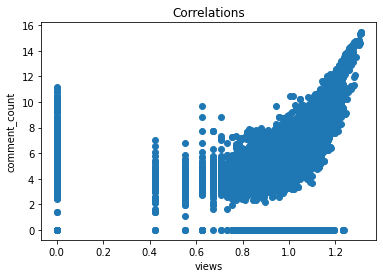

<Figure size 1296x864 with 0 Axes>

In [26]:
ax = plt.subplot(1, 1, 1)
plt.scatter(X.iloc[:, [2]], y)
plt.title('Correlations')
plt.xlabel('views')
plt.ylabel('comment_count')
plt.figure(figsize=(18, 12))
plt.tight_layout()
plt.show()

We are not sure yet whether to say those 'lines' are outliers.
I just grasped the characters of the correlations between features, and we'll see what model can explain better than our insight from now on.

# Data Preprocessing

We will use cross validation later, so we don't separate the dataset here.

In [14]:
#Droping unnecessary datas
krv =krv.drop(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'])

KeyError: "['video_id' 'trending_date' 'title' 'channel_title' 'category_id'\n 'publish_time' 'tags' 'views' 'likes' 'dislikes' 'comment_count'\n 'thumbnail_link' 'comments_disabled' 'ratings_disabled'\n 'video_error_or_removed' 'description'] not found in axis"

# K-Fold Cross Validation

In [ ]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

# Which is the best model for prediction?

In [ ]:
best_model = pd.DataFrame({
    'Model': ['Random Forest','Logistic Regression','K-Nearest Neighbour','Gaussian Naive Bayes','Perceptron','SVM','Decision Tree','XGBoost'], 
    'Result': [random_forest_accuracy,log_regres_accuracy,knn_accuracy,gaussian_accuracy,perceptron_accuracy,svc_accuracy,tree_accuracy,xgb_model_accuracy]})
best_model.sort_values(by=['Result'], ascending=False, inplace=True)
best_model.reset_index(inplace=True, drop=True)
fig = go.Figure(data=[go.Table(
    header=dict(values=list(best_model.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[best_model.Model, best_model.Result],
               fill_color='lavender',
               align='left'))
])
fig.show()

# Submission

In [ ]:
output = pd.DataFrame({'PassengerID': test_data.PassengerId,'Survived':y_pred_xgb_new})
output.to_csv("my_submission.csv", index=False)
print("Submission successfully saved!!!")

> # Summary